### FUEL AMOUNT PREDICTION USING LINEAR REGRESSION

#### STEP 2: IMPORT DATA SET 

Using Pandas, import 'fuel_data.csv' file and print properties such as head(), shape, columns, type and info

In [1]:
import pandas as pd

In [2]:
data1 = pd.read_csv('fuel_data.csv')
data1.head()

,drivenKM,fuelAmount
0,390.0,3600.0
1,403.0,3705.0
2,396.5,3471.0
3,383.5,3250.5
4,321.1,3263.7


In [3]:
data1.columns

Index(['drivenKM', 'fuelAmount'], dtype='object')

In [4]:
data1.dtypes

drivenKM      float64
fuelAmount    float64
dtype: object

In [5]:
data1.info

<bound method DataFrame.info of     drivenKM  fuelAmount
0     390.00      3600.0
1     403.00      3705.0
2     396.50      3471.0
3     383.50      3250.5
4     321.10      3263.7
5     391.30      3445.2
6     386.10      3679.0
7     371.80      3744.5
8     404.30      3809.0
9     392.20      3905.0
10    386.43      3874.0
11    395.20      3910.0
12    381.00      4020.7
13    372.00      3622.0
14    397.00      3450.5
15    407.00      4179.0
16    372.40      3454.2
17    375.60      3883.8
18    399.00      4235.9>

#### STEP 3: PREPROCESSING 

Check for missing values (use isnull() method)

In [6]:
data1.isnull()

,drivenKM,fuelAmount
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


#### STEP 4: VISUALIZE RELATIONSHIPS

In [7]:
import seaborn as sns

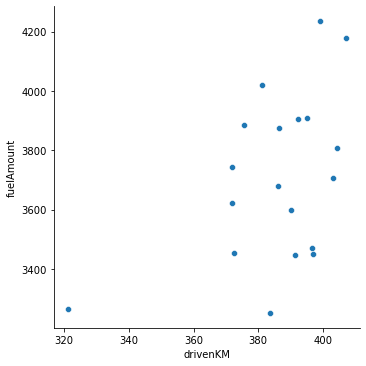

In [10]:
sns.relplot(data=data1, x="drivenKM", y="fuelAmount")

#### STEP 5 

In [90]:
X = data1[['drivenKM']]
X

,drivenKM
0,390.00
1,403.00
2,396.50
3,383.50
4,321.10
5,391.30
6,386.10
7,371.80
8,404.30
9,392.20


In [91]:
y = data1[['fuelAmount']]
y

,fuelAmount
0,3600.0
1,3705.0
2,3471.0
3,3250.5
4,3263.7
5,3445.2
6,3679.0
7,3744.5
8,3809.0
9,3905.0


#### STEP: 6

In [92]:
type(X)

pandas.core.frame.DataFrame

In [93]:
type(y)

pandas.core.frame.DataFrame

#### STEP 7: SPLIT DATASET

In [94]:
from sklearn.model_selection import train_test_split


In [95]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42) 

In [104]:
X_train.shape

(15, 1)

In [105]:
X_test.shape

(4, 1)

In [106]:
y_train.shape

(15, 1)

In [107]:
y_test.shape

(4, 1)

### PART - I LINEAR REGRESSION BASELINE MODEL 

#### STEP 8 : BUILD MODEL 

In [108]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### STEP 9 : PREDICT PRICE FOR 800 KM

In [110]:
y_pred1 = model.predict(800)
y_pred1

array([[6905.64571567]])

#### STEP 10 : PREDICT ON ENTIRE DATASET

In [111]:
y_pred = model.predict(X_test)
y_pred

array([[3775.81615646],
       [3785.74000628],
       [3815.51155575],
       [3875.05465468]])

#### STEP 11 : PRINT MEAN SQUARED ERROR AND R2 ERROR

In [116]:
from sklearn.metrics import mean_squared_error, r2_score
predictions = model.predict(X_test)
r2 = r2_score(y_test, predictions)
mse = mean_squared_error(y_test, predictions)

print('The r2 is: ', r2)
print('The MSE is: ', mse)

The r2 is:  -0.6180990161577022
The MSE is:  46181.36710639155


In [118]:
model.coef_

array([[7.63373063]])

In [119]:
model.intercept_

array([798.6612099])

### PART - II LINEAR REGRESSION WITH SCALING USING STANDARDSCALER

#### STEP 12 : NORMALIZE X_TRAIN AND X_TEST VALUES 

In [ ]:
X_train_ss

In [129]:
from sklearn.preprocessing import StandardScaler

In [130]:
ss = StandardScaler()

In [132]:
x=ss.fit_transform(X_train.values)
x

array([[ 1.0601947 ],
       [-0.5322439 ],
       [ 0.02186483],
       [-0.55221178],
       [ 1.19497791],
       [-0.37250084],
       [ 0.670821  ],
       [ 0.45616627],
       [ 0.79562026],
       [-3.09312478],
       [-0.10293443],
       [-0.56219572],
       [ 0.16812957],
       [ 0.69578085],
       [ 0.15165606]])

In [133]:
X_test_ss= ss.transform(X_test)
X_test_ss

array([[0.34634292],
       [0.41123853],
       [0.60592538],
       [0.99529908]])

In [121]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(data1)
scaled = scaler.fit_transform(data1)
scaled_df = pd.DataFrame(scaled, columns=data1.columns)
print(scaled_df)


    drivenKM  fuelAmount
0   0.802095    0.354678
1   0.953434    0.461234
2   0.877765    0.223767
3   0.726426    0.000000
4   0.000000    0.013396
5   0.817229    0.197585
6   0.756694    0.434849
7   0.590221    0.501319
8   0.968568    0.566775
9   0.827707    0.664197
10  0.760536    0.632738
11  0.862631    0.669271
12  0.697322    0.781612
13  0.592549    0.377004
14  0.883586    0.202963
15  1.000000    0.942257
16  0.597206    0.206718
17  0.634459    0.642683
18  0.906868    1.000000
